### Блок практики

In [106]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [107]:


df1 = pd.read_csv('input/labs.csv')
df2 = pd.read_csv('input/examination.csv')
df3 = pd.read_csv('input/demographic.csv')
df4 = pd.read_csv('input/diet.csv')
df5 = pd.read_csv('input/questionnaire.csv')

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

In [108]:
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

In [109]:
df['Years_in_US'] = df['Years_in_US'].fillna(0.0)

In [110]:
df = df.drop('ID',axis=1)

In [111]:
df.isna().sum()

Gender                  0
Years_in_US             0
Family_income         762
GlycoHemoglobin      3170
ArmCircum             512
SaggitalAbdominal    2595
GripStrength         2136
Breast_fed           1152
dtype: int64

In [112]:
cols_to_fill_with_medain = ['ArmCircum','SaggitalAbdominal', 'GripStrength' ,'Breast_fed','GlycoHemoglobin']
df[cols_to_fill_with_medain] = df[cols_to_fill_with_medain].fillna(df[cols_to_fill_with_medain].median())

In [113]:

df['Family_income'] = df['Family_income'].fillna(method='ffill')

In [114]:
df.isna().sum()

Gender               0
Years_in_US          0
Family_income        0
GlycoHemoglobin      0
ArmCircum            0
SaggitalAbdominal    0
GripStrength         0
Breast_fed           0
dtype: int64

In [115]:


df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

In [116]:
df

,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...
9808,2,4.0,1.25,5.0,29.9,19.1,70.1,2.0,0.0
9809,1,0.0,1.06,5.4,14.7,20.7,60.3,2.0,0.0
9810,1,0.0,5.00,5.3,37.0,24.3,46.6,2.0,0.0
9811,2,3.0,1.53,5.4,19.0,20.7,20.8,2.0,0.0


In [117]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(.8 * (1 - 0.8))
df1 = sel.fit_transform(df)

df = pd.DataFrame(df1,columns=sel.get_feature_names_out())
df

,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Diabetes
0,1.0,0.0,0.84,13.9,35.3,20.6,55.2,2.0
1,1.0,0.0,1.78,9.1,34.7,24.4,61.5,2.0
2,1.0,0.0,4.51,8.9,33.5,25.6,91.0,2.0
3,1.0,0.0,2.52,5.4,21.0,14.9,32.2,0.0
4,2.0,0.0,5.00,4.9,25.2,20.7,30.9,0.0
...,...,...,...,...,...,...,...,...
9808,2.0,4.0,1.25,5.0,29.9,19.1,70.1,0.0
9809,1.0,0.0,1.06,5.4,14.7,20.7,60.3,0.0
9810,1.0,0.0,5.00,5.3,37.0,24.3,46.6,0.0
9811,2.0,3.0,1.53,5.4,19.0,20.7,20.8,0.0


<Axes: >

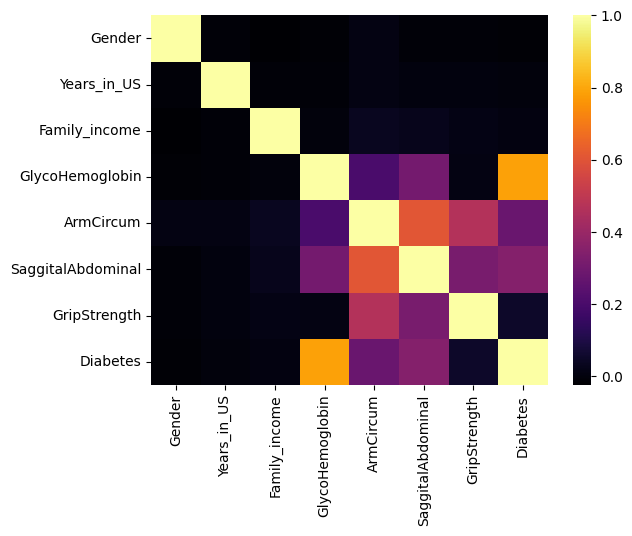

In [118]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

# Постройте корреляционную матрицу
# Подсказка: используйте sns.heatmap
# your code here

corr = df.corr()
sns.heatmap(corr,cmap='inferno')

In [119]:
### Разделим выборку на трейн-тест
X = df.drop('Diabetes',axis=1)
y = df['Diabetes']
# Разделите данные и таргет, затем выполните разбиение на тренировочную и тестовую выборки
# Подсказка: используйте train_test_split
# your code here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [120]:
### Воспользуемся StandardScaler

# Выполните нормализацию данных
# Подсказка: используйте StandardScaler для X_train и X_test
# your code here
X_sc_train = StandardScaler().fit_transform(X_train)
X_sc_test = StandardScaler().fit_transform(X_test)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [121]:
# Обучите модель K-Means
# Подсказка: используйте KMeans с указанными параметрами
# your code here
km = KMeans(n_clusters=3,tol=0.0005,random_state=1)
km.fit(X_sc_train,y_train)

clust_train = km.predict(X_sc_train)
clust_test = km.predict(X_sc_test) 


Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [122]:
# Обучите модели и посчитайте accuracy на тестовой выборке
# your code here
rf = RandomForestClassifier(random_state=1)
lr = LogisticRegression(random_state=1)
svc = LinearSVC(random_state=1)
rf.fit(X_sc_train,y_train)
lr.fit(X_sc_train,y_train)
svc.fit(X_sc_train,y_train)

print(f'rf score {rf.score(X_sc_test,y_test)}')
print(f'lr score {lr.score(X_sc_test,y_test)}')
print(f'svc score {svc.score(X_sc_test,y_test)}')

rf score 0.9638308711156394
lr score 0.9684156902699949
svc score 0.9806418746816098


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [126]:
# Добавьте признак "номер кластера" в обучающие и тестовые данные, затем пересчитайте accuracy для моделей
# your code here
X_sc_train = np.c_[X_sc_train,clust_train]
X_sc_test = np.c_[X_sc_test,clust_test]
rf.fit(X_sc_train,y_train)
lr.fit(X_sc_train,y_train)
svc.fit(X_sc_train,y_train)

print(f'rf score {rf.score(X_sc_test,y_test)}')
print(f'lr score {lr.score(X_sc_test,y_test)}')
print(f'svc score {svc.score(X_sc_test,y_test)}')


rf score 0.9638308711156394
lr score 0.9684156902699949
svc score 0.9811512990320937


Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [132]:
# Вычислите расстояния от объектов до центров кластеров и обучите модели на этих данных
# your code here
km_t_train = km.fit_transform(X_sc_train)
km_t_test = km.fit_transform(X_sc_test)
rf.fit(km_t_train,y_train)
lr.fit(km_t_train,y_train)
svc.fit(km_t_train,y_train)

print(f'rf score {rf.score(km_t_test,y_test)}')
print(f'lr score {lr.score(km_t_test,y_test)}')
print(f'svc score {svc.score(km_t_test,y_test)}')

rf score 0.8894549159449822
lr score 0.8920020376974019
svc score 0.8930208863983699


**Задание 2 (Бонус)** Задача кластеризации может использоваться не только для специфических задач группировки данных, но и для оптимизации других методов. Вы уже знаете, что одна из основных проблем kNN в скорости его предсказания. В этом задании попробуем ускорить работу kNN с помощью кластеризации, не теряя при этом сильно в качестве.

Сначала загрузим уже известные вам данные клиентов страховой компании.

In [137]:
### Загрузим известный нам датасет

data = pd.read_csv('../ensembles/insurance_data_train.csv')

# Убедитесь, что данные корректны
# your code here
cat_cols = data.select_dtypes(include='object').columns
df = pd.get_dummies(data,prefix=cat_cols).drop('id',axis=1)
df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,False,True,False,False,True,False,True
1,76,1,3.0,0,33536.0,26.0,183,0,False,True,True,False,False,True,False
2,47,1,28.0,0,38294.0,26.0,27,1,False,True,False,False,True,False,True
3,21,1,11.0,1,28619.0,152.0,203,0,False,True,False,True,False,True,False
4,29,1,41.0,1,27496.0,152.0,39,0,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0,False,True,True,False,False,True,False
381105,30,1,37.0,1,40016.0,152.0,131,0,False,True,False,True,False,True,False
381106,21,1,30.0,1,35118.0,160.0,161,0,False,True,False,True,False,True,False
381107,68,1,14.0,0,44617.0,124.0,74,0,True,False,False,False,True,False,True


In [141]:
### Разделим выборку на трейн-тест

# Выполните разбиение на тренировочную и тестовую выборки
# your code here
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y.values,
                                                    random_state=0,
                                                    test_size=0.2)

In [142]:
### Нормируем данные

# Выполните нормализацию данных
# Подсказка: используйте StandardScaler
# your code here
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите обычный kNN с одним соседом и измерьте качество, например, взвешенную f-меру, чтобы потом сравнить с нашей реализацией. (1б)

In [145]:
# Обучите модель kNN с одним соседом и оцените её качество
# your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


print(f'KNN f1 test score: {f1_score(y_test, knn.predict(X_test), average="weighted")}')



KNN f1 test score: 0.8342833436085909


Идея ускорения kNN заключается в том, чтобы разбить признаковое пространство (то есть столбцы, а не объекты-строки!) на несколько блоков и кластеризовать каждый блок по-отдельности.

Далее нужно будет заменить в обучающей выборке объекты на их некоторое представление, а именно вместо каждого блока вставить центр кластера, к которому принадлежит эта часть исходного объекта.

Затем подсчет расстояний на этапе применения производится по блокам. Главный плюс алгоритма в том, что у нас уже будут иметься предподсчитанные расстояния по блокам до всех центров кластеров.

Этот алгоритм называется **Product Quantization**. 

Сам алгоритм:

1. Разделите обучающую и контрольную выборки на блоки: равномерно по индексам столбцов.


2. На каждом блоке обучите K-Means и примените transform к соотв. блоку контрольной выборки.


3. Посчитайте расстояния от каждого обучающего объекта до каждого объекта из контрольной выборки
(это вы должны сделать, используя матрицы из предыдущего пункта)


4. Определите для каждого тестового объекта k ближайших

В нашей реализации будем использовать следующие значения параметров: \
`m_blocks` = 5 \
`n_clusters` = 100 \
`k` = 1

In [ ]:
# Реализуйте функцию product_quantization по описанному выше алгоритму
# your code here

In [ ]:
# Запустите реализацию product_quantization и проверьте её корректность
# your code here

Теперь с помощью полученных таблиц осталось посчитать расстояния до каждого объекта обучающей выборки. 
1. Сначала возведите в квадрат `dist_table`, чтобы получить сумму квадратов, а не l2-норму.

2. Для каждого блока по предсказанным меткам класса в `X_train_clusters` отберите соответсвтующие расстояния из dist_table

3. Просуммируйте квадраты расстояний по всем блокам.

4. Найдите индексы самых маленький расстояний и по ним выберите объекты из y_train, это и будут наши предсказания

Замерьте качество, как изменилась скорость работы? 

In [ ]:
# Реализуйте подсчёт расстояний и классификацию
# your code here